In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
with zipfile.ZipFile('C:/Users/jahna/Downloads/archive (2).zip','r') as ext_all:
    with ext_all.open('train_u6lujuX_CVtuZ9i (1).csv') as f:
        df=pd.read_csv(f)
        
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
df=df.drop('Loan_ID',axis=1)

In [4]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender']=df['Gender'].ffill()

In [6]:
df['Married']=df['Married'].ffill()

In [7]:
df['Dependents']=df['Dependents'].replace('3+','3')
df['Dependents']=df['Dependents'].ffill()

In [8]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [9]:
df['Self_Employed']=df['Self_Employed'].ffill()
df['Credit_History']=df['Credit_History'].ffill()

In [10]:
row=df[df.duplicated()]
row

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [11]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:

df['Married']=df['Married'].bfill()
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<Axes: xlabel='Married'>

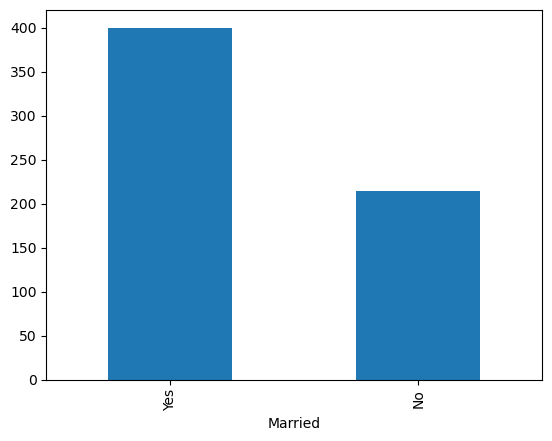

In [16]:
df['Married'].value_counts().plot(kind='bar')

<Axes: xlabel='Self_Employed'>

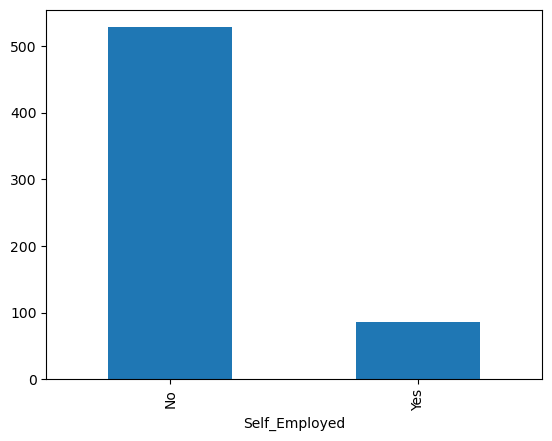

In [17]:
df['Self_Employed'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender,Married,Loan_Status'>

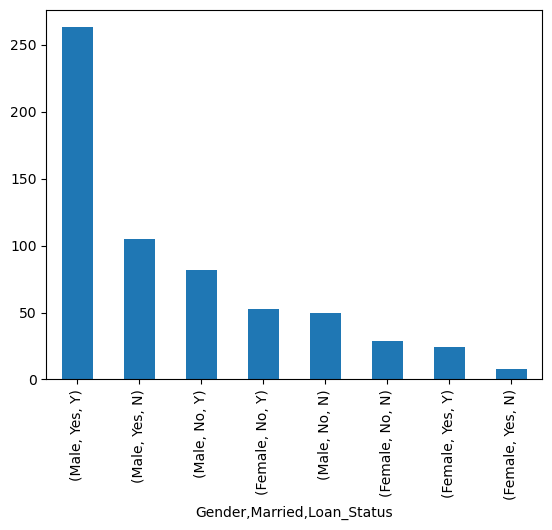

In [18]:
df[['Gender','Married','Loan_Status']].value_counts().plot(kind='bar')
#there having the more corelation between loan status and married having no selfemployeed getting more loans 
#where the male are married are getting more loans

<Axes: xlabel='Gender,Self_Employed,Loan_Status'>

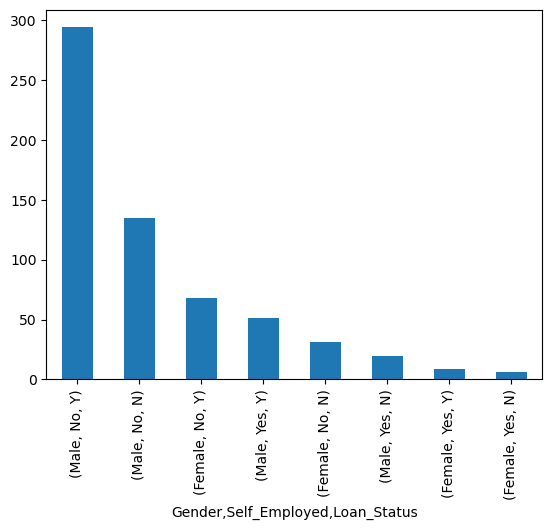

In [19]:
df[['Gender','Self_Employed','Loan_Status']].value_counts().plot(kind='bar')
#married are getting more loans it has strong coraltion
#where the male having no self employed are getting more loans

<Axes: xlabel='Property_Area,Loan_Status'>

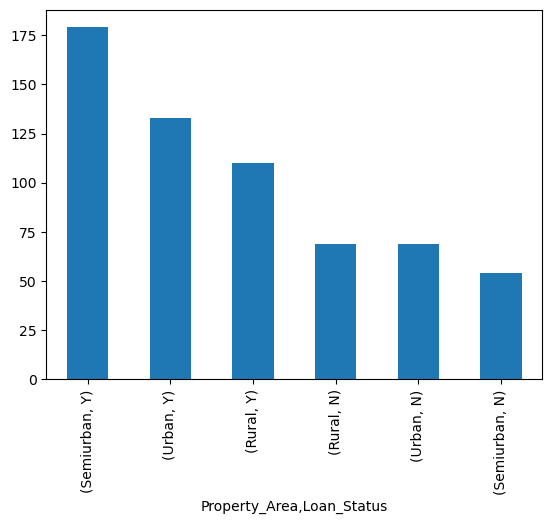

In [20]:
df[['Property_Area','Loan_Status']].value_counts().plot(kind='bar')
#semiurban, urban, married, male, non-self-employed, and graduated are getting more loan
#having the credit with, 0 dependents completed graduated having more loans
#semiurbanwith having the credit,graduated having no self_employed are getting more loans
#semiurban and urban ahving 0 dependance,credit,graduatedand no self_employed are getting more loans

<Axes: ylabel='LoanAmount'>

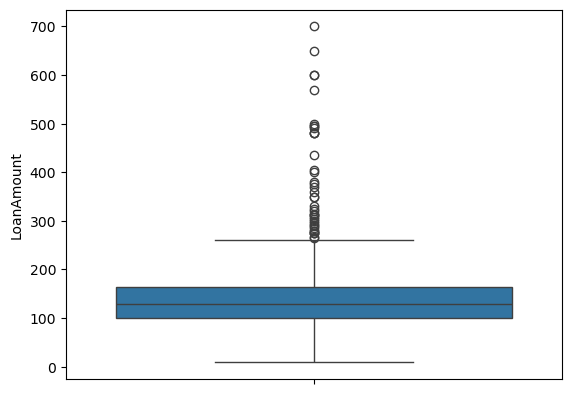

In [21]:
sns.boxplot(df['LoanAmount'])

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.835505
std,6109.041673,2926.248369,84.037468,64.372489,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [23]:

def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    cap_outliers(col)

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.111564,1419.702231,138.025354,342.000000,0.835505
std,2479.851729,1624.605892,55.773951,64.372489,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,10171.250000,5743.125000,261.500000,480.000000,1.000000


In [24]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
#there is no corelation between the applicantIncome,coapplicantIncome and creditHistory
#The loanAmount having applicantincome have more stronglly coreelated
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
# Total Income
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

# Loan to Income Ratio
#df["Loan_Income_Ratio"] = df["LoanAmount"] / df["Total_Income"]

# EMI (monthly installment)
#df["EMI"] = df["LoanAmount"] * 1000 / df["Loan_Amount_Term"]

# Income to EMI ratio
#df["Income_to_EMI"] = df["Total_Income"] / df["EMI"]


Loan_Score = df["Total_Income"]  / df['LoanAmount'] * df['Credit_History']


In [27]:

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [29]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [30]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,2900.0
610,Male,Yes,3,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,4106.0
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,8312.0
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,7583.0


In [31]:
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [32]:
x = pd.get_dummies(x, drop_first=True)


In [33]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,5849.0,True,False,False,False,False,False,False,False,True
1,4583.0,1508.0,128.000000,360.0,1.0,6091.0,True,True,True,False,False,False,False,False,False
2,3000.0,0.0,66.000000,360.0,1.0,3000.0,True,True,False,False,False,False,True,False,True
3,2583.0,2358.0,120.000000,360.0,1.0,4941.0,True,True,False,False,False,True,False,False,True
4,6000.0,0.0,141.000000,360.0,1.0,6000.0,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0,2900.0,False,False,False,False,False,False,False,False,False
610,4106.0,0.0,40.000000,180.0,1.0,4106.0,True,True,False,False,True,False,False,False,False
611,8072.0,240.0,253.000000,360.0,1.0,8312.0,True,True,True,False,False,False,False,False,True
612,7583.0,0.0,187.000000,360.0,1.0,7583.0,True,True,False,True,False,False,False,False,True


In [34]:
x = x.astype({col: int for col in x.select_dtypes(include='bool').columns})

In [35]:
y=np.where(y=='Y',1,0)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583.00,1508.000,128.0,360.0,1.0,6091.000,1,1,1,0,0,0,0,0,0
394,3100.00,1400.000,113.0,360.0,1.0,4500.000,1,1,0,1,0,0,0,0,1
316,3717.00,0.000,120.0,360.0,1.0,3717.000,1,1,0,1,0,0,0,1,0
62,2609.00,3449.000,165.0,180.0,0.0,6058.000,1,1,0,0,0,1,1,0,0
158,2980.00,2083.000,120.0,360.0,1.0,5063.000,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2927.00,2405.000,111.0,360.0,1.0,5332.000,1,0,0,0,0,1,0,1,0
321,4342.00,189.000,124.0,360.0,1.0,4531.000,1,1,0,0,1,0,0,1,0
327,5818.00,2160.000,184.0,360.0,1.0,7978.000,1,1,0,0,0,0,1,1,0
506,10171.25,5743.125,261.5,360.0,1.0,15914.375,1,1,0,0,0,0,0,0,1


In [37]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score


model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced_subsample',
    random_state=42
)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
y_custom = (y_pred >= 0.4).astype(int)
print(confusion_matrix(y_test, y_custom))
print(classification_report(y_test, y_custom))



[[31 17]
 [12 94]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        48
           1       0.85      0.89      0.87       106

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Setup RandomizedSearchCV
random = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random.best_params_)
y_pred1 = random.predict(X_test)
y_c= (y_pred1 >= 0.4).astype(int)
print(confusion_matrix(y_test, y_c))
print(classification_report(y_test, y_c))



Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_resampled, y_resampled)
y_pred1= model1.predict(X_test)
print("confusion_matrix:", confusion_matrix(y_pred1,y_test))
print("classification_report:", classification_report(y_test,y_pred1))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier()
model2.fit(X_resampled, y_resampled)
y_pred2= model2.predict(X_test)
print("confusion_matrix:", confusion_matrix(y_pred2,y_test))
print("classification_report:", classification_report(y_test,y_pred2))

In [ ]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(X_resampled, y_resampled)
y_pred3= model3.predict(X_test)
print("confusion_matrix:", confusion_matrix(y_pred3,y_test))
print("classification_report:", classification_report(y_test,y_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
model4=LogisticRegression()
model4.fit(X_resampled, y_resampled)
y_pred4= model4.predict(X_test)
print("confusion_matrix:", confusion_matrix(y_pred4,y_test))
print("classification_report:", classification_report(y_test,y_pred4))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define the model
model = LogisticRegression(solver='liblinear', random_state=42)

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],                     # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # Inverse of regularization strength
    'class_weight': [None, 'balanced']           # Handle class imbalance
}

# Setup RandomizedSearchCV
randomcv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',   # You can also try 'f1', 'roc_auc'
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the search
randomcv.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random.best_params_)
y_pred2 = randomcv.predict(X_test)
y_co= (y_pred2 >= 0.4).astype(int)
print(confusion_matrix(y_test, y_co))
print(classification_report(y_test, y_co))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(5)
knn.fit(X_resampled, y_resampled)
y_pred5= knn.predict(X_test)
print("confusion_matrix:", confusion_matrix(y_pred5,y_test))
print("classification_report:", classification_report(y_test,y_pred5))


In [ ]:
####testing


In [ ]:
# Example test input as dictionary
test_sample = {
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents':[1],
    'Self_Employed':['no'],
    'Education': ['Graduate'],
    'Property_Area': ['Rural'],
    'ApplicantIncome': [4583],
    'CoapplicantIncome':[1508],
    'Credit_History':[1],
    'LoanAmount': [140.4],
    'Loan_Amount_Term': [360]
}


import pandas as pd

df_test = pd.DataFrame(test_sample)


In [ ]:
df_test

In [ ]:
# Fix case consistency
df_test['Dependents'] = df_test['Dependents'].replace('3+', '3')
df_test['Self_Employed'] = df_test['Self_Employed'].str.capitalize()
df_test['Married'] = df_test['Married'].str.capitalize()
df_test['Gender'] = df_test['Gender'].str.capitalize()
df_test['Education'] = df_test['Education'].str.capitalize()
df_test['Property_Area'] = df_test['Property_Area'].str.capitalize()

# Create total income feature
df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

# (Optional) Create Loan Score if you used it
df_test['Loan_Score'] = (df_test['Total_Income'] / df_test['LoanAmount']) * df_test['Credit_History']

# Drop unused columns if you dropped in training
# Make sure columns are in same structure
df_test = df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)


In [ ]:
# Apply one-hot encoding
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# Align the columns with training set
df_test_encoded = df_test_encoded.reindex(columns=x.columns, fill_value=0)


In [ ]:
# Predict the result
prediction = best_model.predict(df_test_encoded)
result = 'Loan Approved' if prediction[0] == 1 else 'Loan Rejected'
print("Prediction:", result)
